# Gradient Descendent Process Example

This notebook aims to illustrate the process of model fitting during machine learning training, emphasizing the optimization of model performance by minimizing the loss function.
In this example, we utilize the PyTorch package, which facilitates gradient computations, given its specifications for the training of deep learning models

## Import Packages

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import io
from IPython.display import Image, display

np.random.seed(0)


## Generate synthetic data

In [2]:
# Generate synthetic medical dataset
age = np.random.randint(20, 80, size=100)  # Age between 20 and 80
blood_pressure = 120 + 0.5 * age + np.random.randn(100) * 5  # BP with some noise

# Convert to pandas DataFrame
data = pd.DataFrame({'Age': age, 'BloodPressure': blood_pressure})

# Convert to numpy arrays and normalize
X = data['Age'].values.astype(np.float32).reshape(-1, 1)
y = data['BloodPressure'].values.astype(np.float32).reshape(-1, 1)

# Standardize the data
X_mean, X_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()

X_normalized = (X - X_mean) / X_std
y_normalized = (y - y_mean) / y_std

## Convert to tensor

In [3]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X_normalized, requires_grad=False)
y_tensor = torch.tensor(y_normalized, requires_grad=False)

# Add bias term
X_b = torch.cat([torch.ones((100, 1)), X_tensor], dim=1)

# Store images for GIF
images = []

## Auxiliar function to plot the linear regression

In [4]:
def plot_regression_line(X, y, theta, iteration):
    plt.figure()
    plt.scatter(X[:, 1].numpy() * X_std + X_mean, y.numpy() * y_std + y_mean, color='blue')  # Plot original data
    X_plot = np.array([[X[:, 1].min()], [X[:, 1].max()]], dtype=np.float32)
    X_plot_b = torch.tensor(np.c_[np.ones((2, 1)), X_plot], dtype=torch.float32)
    y_plot = X_plot_b.mm(theta).detach().numpy()
    
    # Extract the coefficients
    beta_0_norm = theta[0].item()
    beta_1_norm = theta[1].item()
    
    # Denormalize the coefficients
    beta_1 = beta_1_norm * (y_std / X_std)
    beta_0 = y_mean + beta_0_norm * y_std - beta_1 * X_mean
    
    plt.plot(X_plot * X_std + X_mean, y_plot * y_std + y_mean, color='red', label=f'Iteration {iteration}: y={beta_0:.2f}+{beta_1:.2f}x')
    plt.xlabel("Age")
    plt.ylabel("Blood Pressure")
    plt.legend()
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    images.append(imageio.imread(buf))
    plt.close()

## Minimizing the Sum of Squared Residuals

In [5]:
# Initialize parameters
theta = torch.randn(2, 1, requires_grad=True)

# Learning rate and number of iterations
learning_rate = 0.05
n_iterations = 50

optimizer = torch.optim.SGD([theta], lr=learning_rate)

In [6]:
# Gradient Descendent Process
for iteration in range(n_iterations):
    y_pred = X_b.mm(theta)
    loss = torch.mean((y_pred - y_tensor) ** 2)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    # Plot current state and save to memory
    plot_regression_line(X_b, y_tensor, theta, iteration)

# Create the GIF
imageio.mimsave("gradient_descendent_example.gif", images, duration=0.1)

/tmp/ipykernel_80202/1845316460.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))


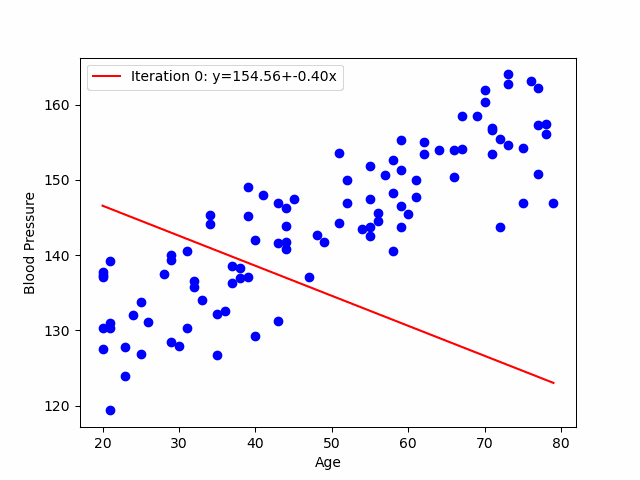

In [8]:
display(Image(filename="gradient_descendent_example.gif"))